# Graded Lab Assignment 2: Evaluate classifiers (10 points)
 
In this assignment you will optimize and compare the perfomance of a parametric (logistic regression) and non-parametric (k-nearest neighbours) classifier on the MNIST dataset.

Publish your notebook (ipynb file) to your Machine Learning repository on Github ON TIME. We will check the last commit on the day of the deadline.  

### Deadline Friday, November 17, 23:59.

This notebook consists of three parts: design, implementation, results & analysis. 
We provide you with the design of the experiment and you have to implement it and analyse the results.

### Criteria used for grading
* Explain and analyse all results.
* Make your notebook easy to read. When you are finished take your time to review it!
* You do not want to repeat the same chunks of code multiply times. If your need to do so, write a function. 
* The implementation part of this assignment needs careful design before you start coding. You could start by writing pseudocode.
* In this exercise the insights are important. Do not hide them somewhere in the comments in the implementation, but put them in the Analysis part
* Take care that all the figures and tables are well labeled and numbered so that you can easily refer to them.
* A plot should have a title and axes labels.
* You may find that not everything is 100% specified in this assignment. That is correct! Like in real life you probably have to make some choices. Motivate your choices.


### Grading points distribution

* Implementation 5 points
* Results and analysis 5 points

## Design of the experiment

You do not have to keep the order of this design and are allowed to alter it if you are confident.
* Import all necessary modules. Try to use as much of the available functions as possible. 
* Use the provided train and test set of MNIST dataset.
* Pre-process data eg. normalize/standardize, reformat, etc.           
  Do whatever you think is necessary and motivate your choices.
* (1) Train logistic regression and k-nn using default settings.
* Use 10-fold cross validation for each classifier to optimize the performance for one parameter: 
    * consult the documentation on how cross validation works in sklearn (important functions:             cross_val_score(), GridSearchCV()).
    * Optimize k for k-nn,
    * for logistic regression focus on the regularization parameter,
* (2) Train logistic regression and k-nn using optimized parameters.
* Show performance on the cross-validation set for (1) and (2) for both classifiers: 
    * report the average cross validation error rates (alternatively, the average accuracies - it's up to you) and standard deviation,
    * plot the average cross valildation errors (or accuracies) for different values of the parameter that you tuned. 
* Compare performance on the test set for two classifiers:
    * produce the classification report for both classifiers, consisting of precision, recall, f1-score. Explain and analyse the results.
    * print confusion matrix for both classifiers and compare whether they missclassify the same  classes. Explain and analyse the results.
* Discuss your results.
* BONUS: only continue with this part if you are confident that your implemention is complete 
    * tune more parameters of logistic regression
    * add additional classifiers (NN, Naive Bayes, decision tree), 
    * analyse additional dataset (ex. Iris dataset)

## Implementation of the experiment

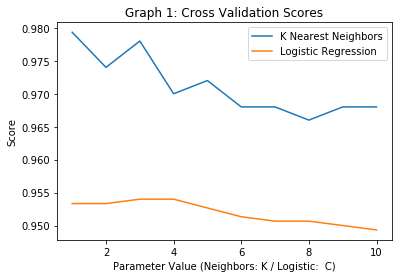

The initial accuracies are: logistic 0.8787878787878788 / k_NN 0.9090909090909091
The accuracies after optimizing are: logistic 0.8922558922558923 / k_NN 0.9292929292929293


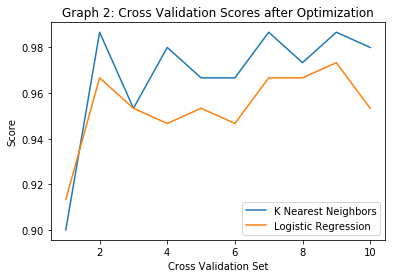

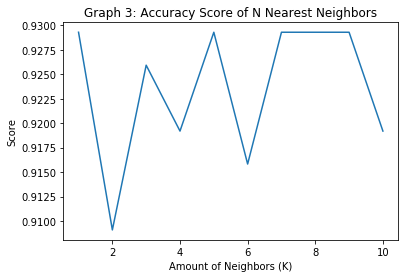


 The Confusion Matrix for the Logistic Regression is: 

[[25  0  0  0  0  0  2  0  0  0]
 [ 0 26  0  2  0  0  0  0  3  0]
 [ 0  0 27  0  0  0  0  0  0  0]
 [ 0  0  0 21  0  2  0  2  5  0]
 [ 0  0  0  0 30  0  0  0  0  3]
 [ 0  0  0  0  0 30  0  0  0  0]
 [ 0  0  0  0  0  0 30  0  0  0]
 [ 0  0  0  0  2  0  0 26  2  0]
 [ 0  2  0  1  0  0  0  0 25  0]
 [ 1  1  0  2  0  1  0  1  0 25]]

 The Confusion Matrix for the K Nearest Neighbors is: 

[[27  0  0  0  0  0  0  0  0  0]
 [ 0 31  0  0  0  0  0  0  0  0]
 [ 0  1 24  0  0  0  2  0  0  0]
 [ 0  0  0 28  0  2  0  0  0  0]
 [ 0  0  0  0 29  0  0  1  0  3]
 [ 0  1  0  0  1 28  0  0  0  0]
 [ 0  0  0  0  0  0 30  0  0  0]
 [ 0  0  0  0  0  0  0 30  0  0]
 [ 0  3  0  1  0  0  0  0 23  1]
 [ 0  0  0  1  0  2  0  2  0 26]]

 The Classification Report for the Logistic Regression is: 

             precision    recall  f1-score   support

          0       0.96      0.93      0.94        27
          1       0.90      0.84      0.87        31
  

In [67]:
#Importing all necessary 
from sklearn import preprocessing
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import datasets # to load the dataset
from sklearn.preprocessing import StandardScaler # to normalize data (NN is very sensitive to this!)
from sklearn.model_selection import train_test_split #to split in train and test set
from sklearn.linear_model import LogisticRegression #logistic regression classifier
from sklearn.model_selection import cross_val_score #BONUS: to tune parameters using cross-validation
from sklearn.datasets import load_digits
from sklearn import datasets # to load the dataset
from sklearn.model_selection import train_test_split #to split in train and test set
from sklearn.model_selection import cross_val_score #BONUS
from sklearn.metrics import classification_report, accuracy_score # for reporting
from scipy.spatial import distance #to calculate the Euclidean distance
from collections import Counter #to count unique occurances of items in array, for majority voting

# load mnist dataset
digits = load_digits()

#Divide the dataset into train and testing sets
X_train_mnist = digits.images[:1500].reshape(1500,64)
X_test_mnist = digits.images[1500:].reshape(297,64)
y_train_mnist = digits.target[:1500]
y_test_mnist = digits.target[1500:]

#Preprocess the dataset by normalizing it
X_train_std = preprocessing.scale(X_train_mnist)
X_test_std = preprocessing.scale(X_test_mnist)

#Train using Logistic Regression
logistic = LogisticRegression(C=50)           #loading logistic regression with a random intital value for C
logistic.fit(X_train_std, y_train_mnist)

#Train using K-NN
K_NN = KNeighborsClassifier(n_neighbors=50)             #loading K Nearest Neighbors with a random intital value for K
K_NN.fit(X_train_std, y_train_mnist)

#Store accuracy to compare later
log_acc_basic = metrics.accuracy_score(y_test_mnist, logistic.predict(X_test_std))
kNN_acc_basic = metrics.accuracy_score(y_test_mnist, K_NN.predict(X_test_std))

scores_log = list()
for x in (1, 2, 3, 4, 5, 6, 7, 8, 9, 10):
    log = LogisticRegression(C=x)                                                #iterating using different parameter values
    log.fit(X_train_std, y_train_mnist)
    log_CV_score = cross_val_score(log, X_train_std, y_train_mnist, cv=k_fold)   #creating the CV scores
    score_log = log_CV_score
    scores_log.append(np.mean(score_log))                                        #storing the CV scores

scores_kN = list()
for x in (1, 2, 3, 4, 5, 6, 7, 8, 9, 10):
    k_N = KNeighborsClassifier(n_neighbors=x)                                    #iterating using different parameter values
    k_N.fit(X_train_std, y_train_mnist)
    kN_CV_score = cross_val_score(k_N, X_train_mnist, y_train_mnist, cv=k_fold)  #creating the CV scores
    score_kN = kN_CV_score
    scores_kN.append(np.mean(score_kN))                                          #storing the CV scores

x_axis = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]                                         #creating the values for the x axis
plt.plot(x_axis, scores_kN, label='K Nearest Neighbors')
plt.plot(x_axis, scores_log, label='Logistic Regression')
plt.xlabel('Parameter Value (Neighbors: K / Logistic:  C)')
plt.ylabel('Score')
plt.title('Graph 1: Cross Validation Scores')
plt.legend()
plt.show()

#Train logistic regression with optimized parameter
log_opt = LogisticRegression(C=3) #loading logistic regression
log_opt.fit(X_train_std, y_train_mnist)
log_acc_opt = metrics.accuracy_score(y_test_mnist, log_opt.predict(X_test_std))  #again calculate the accuracy to compare

#Train K-NN with optimized k
k_NN_opt = KNeighborsClassifier(n_neighbors=1)
k_NN_opt.fit(X_train_std, y_train_mnist)
kNN_acc_opt = metrics.accuracy_score(y_test_mnist, k_NN_opt.predict(X_test_std)) #again calculate the accuracy to compare

print("The initial accuracies are: logistic {0} / k_NN {1}".format(log_acc_basic, kNN_acc_basic))
print("The accuracies after optimizing are: logistic {0} / k_NN {1}".format(log_acc_opt, kNN_acc_opt))

#Display performance of the logistic regression on the cross validation set
log_CV_score_opt = cross_val_score(log_opt, X_train_std, y_train_mnist, cv=k_fold)   #creating the CV scores

#Display performance of the K-NN on the cross validation set
kN_CV_score_opt = cross_val_score(k_NN_opt, X_train_mnist, y_train_mnist, cv=k_fold)  #creating the CV scores

plt.plot(x_axis, kN_CV_score, label='K Nearest Neighbors')
plt.plot(x_axis, log_CV_score_opt, label='Logistic Regression')
plt.xlabel('Cross Validation Set')
plt.ylabel('Score')
plt.title('Graph 2: Cross Validation Scores after Optimization')
plt.legend()
plt.show()


#Extra (see Analysis)
accuracies = list()
for x in (1, 2, 3, 4, 5, 6, 7, 8, 9, 10):
    kNN_acc_CV = KNeighborsClassifier(n_neighbors=x)
    kNN_acc_CV.fit(X_train_std, y_train_mnist)
    kNN_acc_CV_scores = metrics.accuracy_score(y_test_mnist, kNN_acc_CV.predict(X_test_std))
    acc_score = kNN_acc_CV_scores
    accuracies.append(acc_score)
    
plt.plot(x_axis, accuracies)
plt.xlabel('Amount of Neighbors (K)')
plt.ylabel('Score')
plt.title('Graph 3: Accuracy Score of N Nearest Neighbors')
plt.show()

#Confusion Matrices
print('\n The Confusion Matrix for the Logistic Regression is: \n')
print(confusion_matrix(y_test_mnist, log_opt.predict(X_test_std)))
print('\n The Confusion Matrix for the K Nearest Neighbors is: \n')
print(confusion_matrix(y_test_mnist, k_NN_opt.predict(X_test_std)))

#Classification Reports
print('\n The Classification Report for the Logistic Regression is: \n')
print(classification_report(y_test_mnist, log_opt.predict(X_test_std)))
print('\n The Classification Report for the K Nearest Neighbors is:\n')
print(classification_report(y_test_mnist, k_NN_opt.predict(X_test_std)))

## Results and analysis of the experiment

ANALYSIS

After training with the sets, it became apparent from the Cross Validation Scores that the K Nearest Neighbor algorithm was producing better scores than the Logistic Regression (see Graph 1), which will most likely not change after parameter value alterations. After studying Graph 1, it became apparent that the optimal parameter values were 1 for the Neirest Neighbor and 5 for the Logistic Regression. However, after going deeper into the accuracies measured when using different parameter values, it was concluded that other parameter values would have yielded the same accuracy scores (see Graph 3).
As predicted, even after altering the parameter values according to our findings, K Nearest Neighbors was still outcompeting the Logistic Regression (see Graph 2). 

To even more stress the difference between the two algorithms, we can take a look at the Confusion Matrices and the Classification Reports. Comparing the Confusion Matrices learns us that not only does the K Nearest Neighbor do a better job classifying the datasets, but it varies where the two algorithms make mistake. We see this in the position of the errors in the matrix.
This is backed by the fact that the precision and F1 scores are quite different between the two algorithms. Especially when considering that in the Graphs, K Nearest Neighbors was always the better performing algorithm, but this is not the case when looking at the Classification Reports.

Even though the latter two arguments argue for a closer look at the potential of Logistic Regression, we still have to conclude that in this case, N Nearest Neighbors is the winner.
